In [1]:
import sys
sys.path.append('../')
from utilities import *
import utilities

# Loading in the Dataset

In [ ]:
# Define the transformations for training data
transform_training_data = Compose([
    ResizeWithPad(new_shape=(224, 224)),
    ToTensor(),
    CustomNormalize(),
])

# Define the transformations for validation data (no augmentation, only necessary processing)
transform_validation_data = Compose([
    ResizeWithPad(new_shape=(224, 224)),
    ToTensor(),
    CustomNormalize(),
])

train_loader, val_loader = get_train_and_validation_loader(transform_training_data, transform_validation_data, batch_size=32)

In [ ]:
# Load a pre-trained model from timm
model = timm.create_model('vit_base_patch16_224', pretrained=True, num_classes=3)
model = model.to(device)

# Define optimizer, criterion, and scheduler
epochs = 100
base_lr = 1e-3
weight_decay = 0.03
optimizer = optim.Adam(model.parameters(), lr=base_lr, weight_decay=weight_decay)
criterion = nn.CrossEntropyLoss()
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [ ]:
train_losses, val_losses, train_accuracies, val_accuracies, train_f1_scores, val_f1_scores, train_recalls, val_recalls, train_precisions, val_precisions, train_conf_matrices, val_conf_matrices, all_train_labels, all_train_probs, all_val_labels, all_val_probs = vit_train(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs, device)

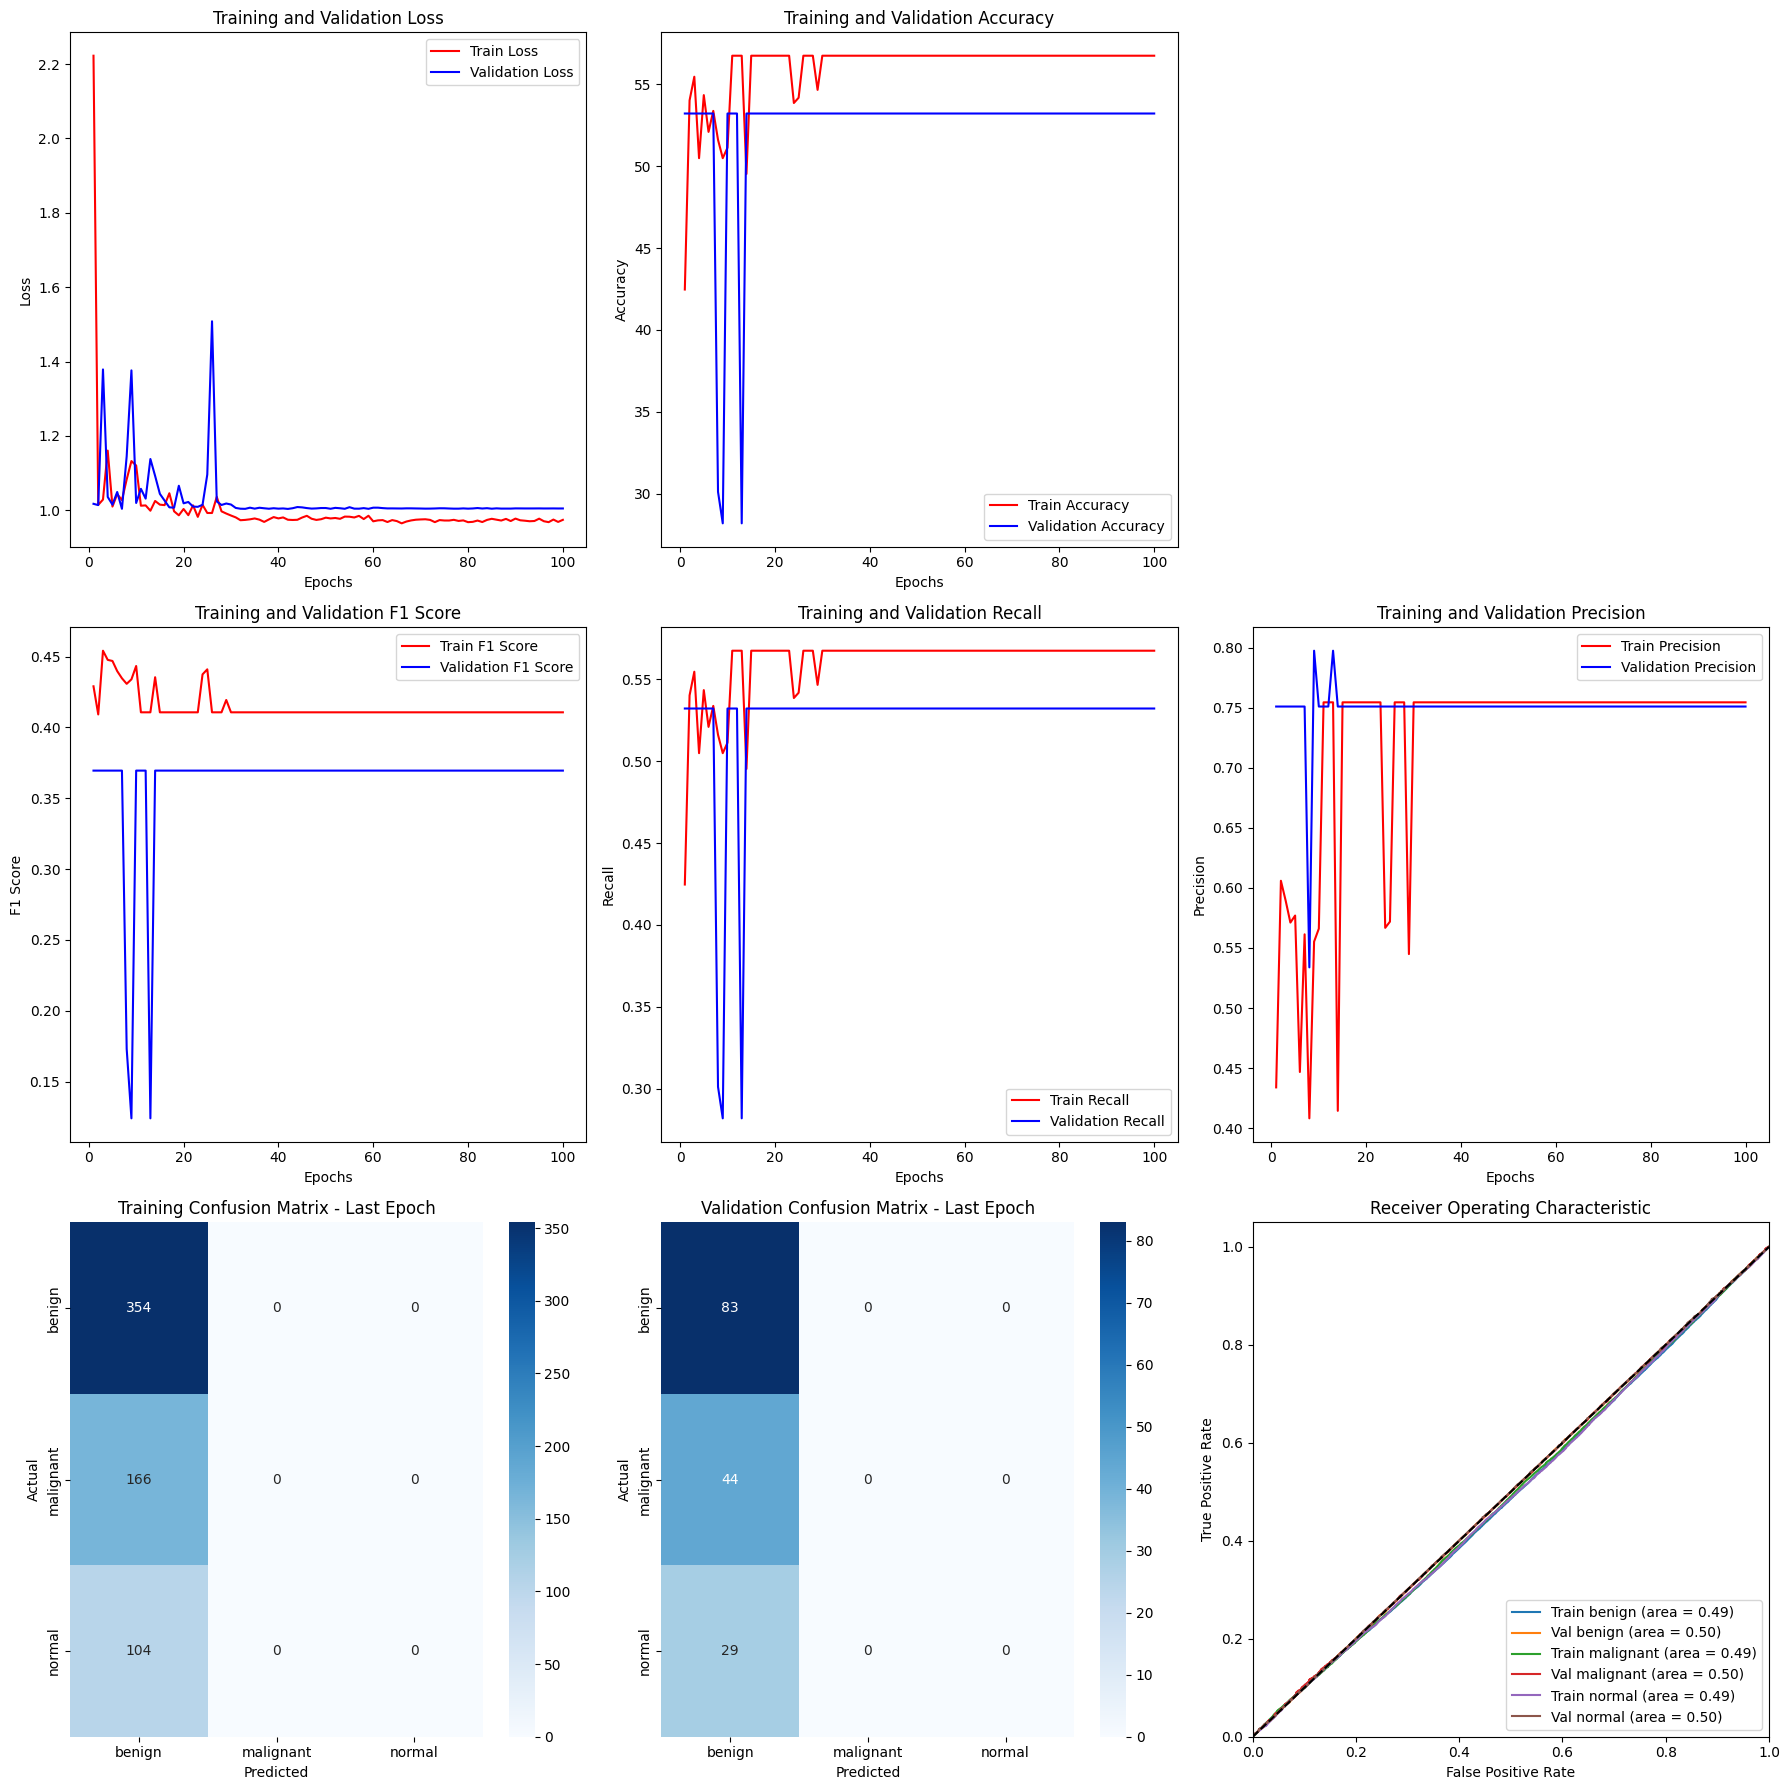

In [ ]:
# Plotting metrics
vit_plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies, train_f1_scores, val_f1_scores, train_recalls, val_recalls, train_precisions, val_precisions, train_conf_matrices, val_conf_matrices, all_train_labels, all_train_probs, all_val_labels, all_val_probs, train_loader.dataset.dataset.classes)

In [ ]:
save_model(model, './models/vit-impl-4-timm.pth')

In [ ]:
model = ViT().to(device)
load_model(model, './models/vit-impl-4-timm.pth')

In [ ]:
# vit_test(model, val_loader, train_loader.dataset.dataset.classes, mean, std)